In [2]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [48]:
def f(x):
    return 5 * x**3 - 8 * x**2 - 7 * x + 1

x = np.linspace(-20, 20, 300)
y = f(x)

In [49]:
def normalize(a: np.ndarray):
    return 2 * (a - np.min(a)) / (np.max(a) - np.min(a)) - 1

x = normalize(x)
y = normalize(y)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

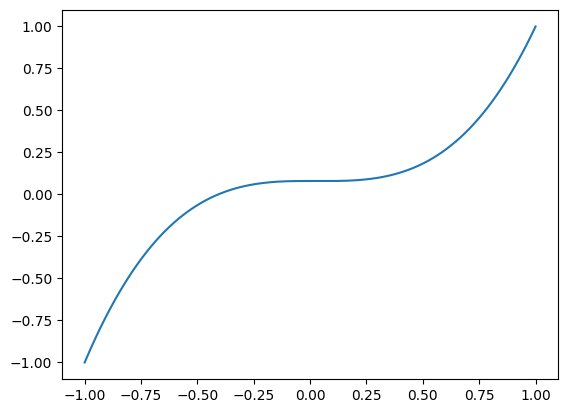

In [51]:
plt.plot(x, y)

In [52]:
def get_model():
    inputs = keras.Input(shape=(1,))
    x = keras.layers.Dense(32, activation='relu')(inputs)
    x = keras.layers.Dense(64, activation='relu')(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    outputs = keras.layers.Dense(1, activation='tanh')(x)
    return keras.Model(inputs, outputs)


model = get_model()
model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_12 (Dense)            (None, 32)                64        
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[
        keras.metrics.R2Score()
    ]
)

history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_split=0.05)


Epoch 1/20
9/9 [==============================] - 1s 13ms/step - loss: 0.1187 - r2_score: 0.1749 - val_loss: 0.0959 - val_r2_score: 0.5100
Epoch 2/20
9/9 [==============================] - 0s 3ms/step - loss: 0.0493 - r2_score: 0.6571 - val_loss: 0.0476 - val_r2_score: 0.7569
Epoch 3/20
9/9 [==============================] - 0s 3ms/step - loss: 0.0335 - r2_score: 0.7673 - val_loss: 0.0353 - val_r2_score: 0.8195
Epoch 4/20
9/9 [==============================] - 0s 3ms/step - loss: 0.0280 - r2_score: 0.8055 - val_loss: 0.0324 - val_r2_score: 0.8344
Epoch 5/20
9/9 [==============================] - 0s 3ms/step - loss: 0.0236 - r2_score: 0.8362 - val_loss: 0.0296 - val_r2_score: 0.8487
Epoch 6/20
9/9 [==============================] - 0s 4ms/step - loss: 0.0202 - r2_score: 0.8599 - val_loss: 0.0235 - val_r2_score: 0.8797
Epoch 7/20
9/9 [==============================] - 0s 4ms/step - loss: 0.0176 - r2_score: 0.8775 - val_loss: 0.0203 - val_r2_score: 0.8964
Epoch 8/20
9/9 [=================

In [54]:
model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 33ms/step


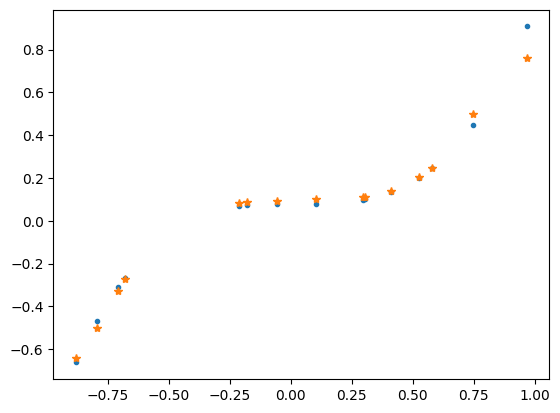

In [55]:
plt.plot(x_test, y_test, '.')
plt.plot(x_test, y_pred, '*')

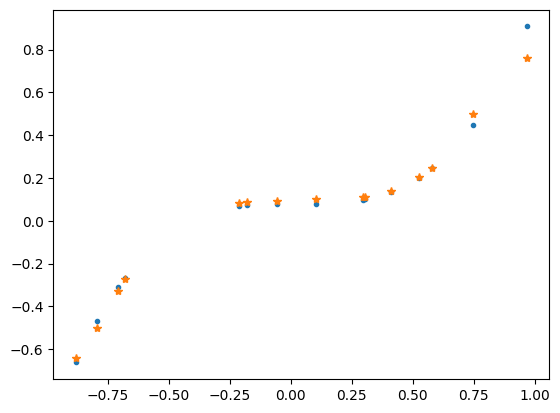

In [56]:
plt.plot(x_test, y_test, '.')
plt.plot(x_test, y_pred, '*')

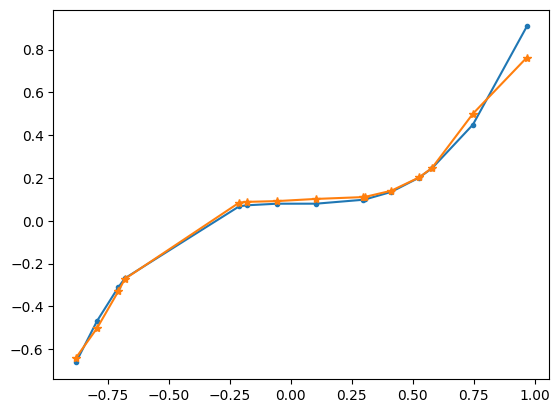

In [58]:
def serialize(x, y):
    xx = sorted(list(zip(list(x), list(np.reshape(y, -1)))))
    x1 = [i[0] for i in xx]
    y1 = [i[1] for i in xx]
    return x1, y1


x1, y1 = serialize(x_test, y_test)
x2, y2 = serialize(x_test, y_pred)

plt.plot(x1, y1, '.-')
plt.plot(x2, y2, '*-')

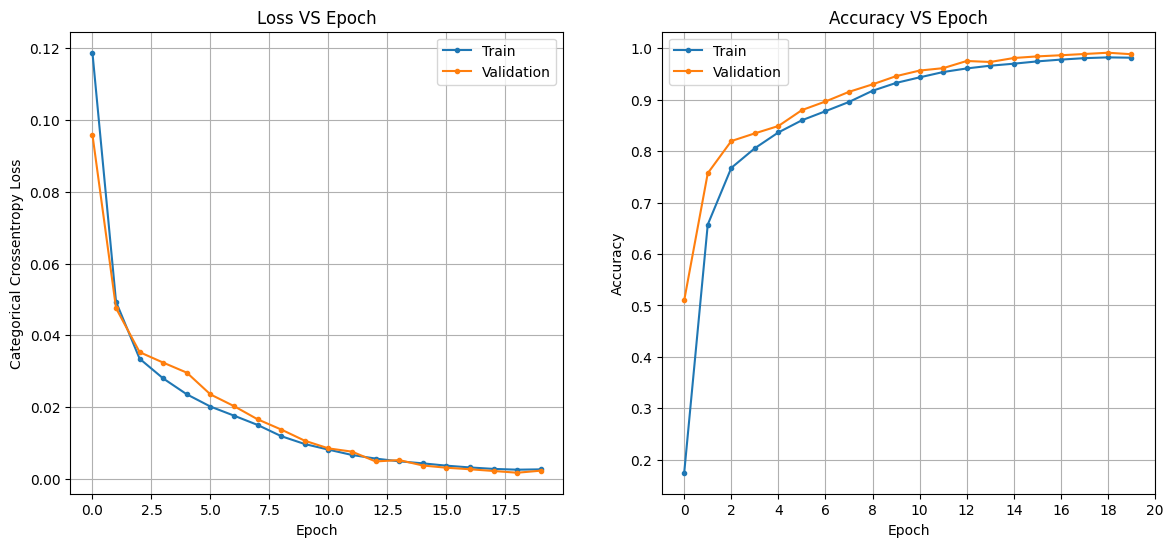

In [64]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], '.-')
plt.plot(history.history['val_loss'], '.-')


plt.xlabel('Epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.legend(["Train", "Validation", "Augmented Train", "Augmented Validation"])
plt.title('Loss VS Epoch')
plt.grid('on')


plt.subplot(1, 2, 2)
plt.plot(history.history['r2_score'], '.-')
plt.plot(history.history['val_r2_score'], '.-')


plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(0, 21, 2))
plt.legend(["Train", "Validation", "Augmented Train", "Augmented Validation"])
plt.title('Accuracy VS Epoch')
plt.grid('on')